# Kütüphanelerin Import Edilmesi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from termcolor import colored
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

# Verisetinin Yüklenmesi

In [ ]:
df = pd.read_csv('Uyku_verileri.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea




*   Veriseti Kaggle'dan alınmıştır.
*   Toplam 374 satır ve 13 sütundan oluşmaktadır.
*   Tahmin yaptığımız sütun "Sleep Disorder" .





In [ ]:
df.shape

(374, 13)

# Veriseti Hakkında Bilgiler

**Kişi Kimliği** (Person ID): Her birey için tanımlayıcı bir kimlik numarası.

**Cinsiyet** (Gender): Kişinin cinsiyeti (Erkek/Kadın).

**Yaş** (Age): Kişinin yaşı (yıl olarak).

**Meslek** (Occupation): Kişinin mesleği ya da yaptığı iş.

**Uyku Süresi** (Saat) (Sleep Duration): Kişinin günde kaç saat uyuduğu.

**Uyku Kalitesi**  (1-10 arası ölçek) (Quality of Sleep): Uyku kalitesine dair 1 ile 10 arasında öznel bir değerlendirme.

**Fiziksel Aktivite Süresi** (Dakika/gün) (Physical Activity Level): Kişinin günlük olarak fiziksel aktiviteye ayırdığı dakika sayısı.

**Stres Seviyesi** (1-10 arası ölçek) (Stress Level): Kişinin yaşadığı stres düzeyine dair 1 ile 10 arasında öznel bir değerlendirme.

**Vücut Kitle İndeksi Kategorisi** (BMI Category): Kişinin Vücut Kitle İndeksi (VKİ) kategorisi (örneğin: Zayıf, Normal, Kilolu, Obez).

**Tansiyon** (sistolik/diyastolik) (Blood Pressure): Kişinin tansiyonu, büyük tansiyon / küçük tansiyon şeklinde ifade edilir.

**Nabız** (bpm) (Heart Rate): Kişinin dakikadaki istirahat halindeki kalp atış sayısı (bpm: beats per minute).

**Günlük Adım Sayısı** (Daily Steps): Kişinin bir günde attığı adım sayısı.

**Uyku Bozukluğu** (Sleep Disorder): Kişide uyku bozukluğu olup olmadığı ( Hastalık Yok, İnsomnia, Uyku Apnesi).

# Keşifsel Veri Analizi (Eda) - Exploratory Data Analysis

In [ ]:
column_names = df.columns.tolist()
print(column_names)

['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']




*   Verisetindeki tüm sütunlar




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB




*  5 sütun object değerlerden oluşuyor. Kalan sütunlar numerik değerlerden oluşmaktadır. Veri ön işleme adımında object veriler sayısal verilere dönüştürülmüştür.




In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0




*   Boş değer yoktur.




In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
deger_sayisi = (df.nunique())
print(deger_sayisi)

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64




*   Her sütundaki eşsiz (unique) değerlerin sayısını hesaplar.




In [ ]:
classes=df['Sleep Disorder'].unique()
print('Sınıflar :',classes)

Sınıflar : ['No disorder' 'Sleep Apnea' 'Insomnia']




*  Uyku bozukluğu sınıflarını gösterir.




In [ ]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
No disorder,219
Sleep Apnea,78
Insomnia,77




*   Sınıf dengesizliği olduğunu görebiliyoruz.
*   "No disorder" sınıfı 219 örnekle baskın durumda.
*   "Sleep Apnea" ve "Insomnia" sınıfları ise 77 ve 78 örnekle azınlıkta.






In [ ]:
import plotly.express as px

fig = px.histogram(
    df,
    x='Sleep Disorder',
    barmode="group",
    color='Sleep Disorder',
    color_discrete_sequence=['white', '#4A235A', '#C39BD3'],
    text_auto=True
)

fig.update_layout(
    title={
        'text': '<b>Kişilerin Uyku Bozukluğu Dağılımı</b>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 25}
    },
    xaxis_title='Uyku Bozukluğu',
    yaxis_title='Kişi Sayısı',
    paper_bgcolor='#EBDEF0',
    plot_bgcolor='#EBDEF0',
    showlegend=True
)

fig.update_yaxes(showgrid=False)
fig.show()


# Veri Ön İşleme (Data Processing)

In [ ]:
df.drop(['Person ID'], axis=1, inplace=True)



*  ✅ Person ID sütunu verisetinden çıkarılır.




In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])



*  ✅ Her bir kategorik sütun, LabelEncoder kullanılarak 0, 1, 2 gibi sayısal değerlere dönüştürülüyor.

*  Insomnia → 0
*  None → 1
*  Sleep Apnea → 2









In [ ]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})


Neden Blood Pressure sütununda Label Encoding uygulamadık ?


*   LabelEncoder, kategorik (nitel) verileri sayılara dönüştürmek için kullanılır. Örneğin "Male", "Female" gibi sınıfları 0 ve 1 gibi değerlere çevirir. Ama "120/80", "140/90" gibi sayısal oranları 0, 1, 2 gibi keyfi sayılara dönüştürmek, verideki anlamı bozar. Bu değerler bir sıralama ya da kategori değil, doğrudan sayısal ölçümler.


*   Aslında burada **Feature Engineering** (Özellik Mühendisliği) yapmış olduk.








*   *  ✅ Verileri int tipine dönüştürdük.




In [ ]:
df['BloodPressure_Upper_Value'] = df['BloodPressure_Upper_Value'].astype(int)
df['BloodPressure_Lower_Value'] = df['BloodPressure_Lower_Value'].astype(int)



*   ✅ Tip dönüşümünün kontrolünü yaptık.



In [ ]:
print(df['BloodPressure_Upper_Value'].dtype)
print(df['BloodPressure_Lower_Value'].dtype)


int64
int64


In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,27,9,6.1,6,42,6,3,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90


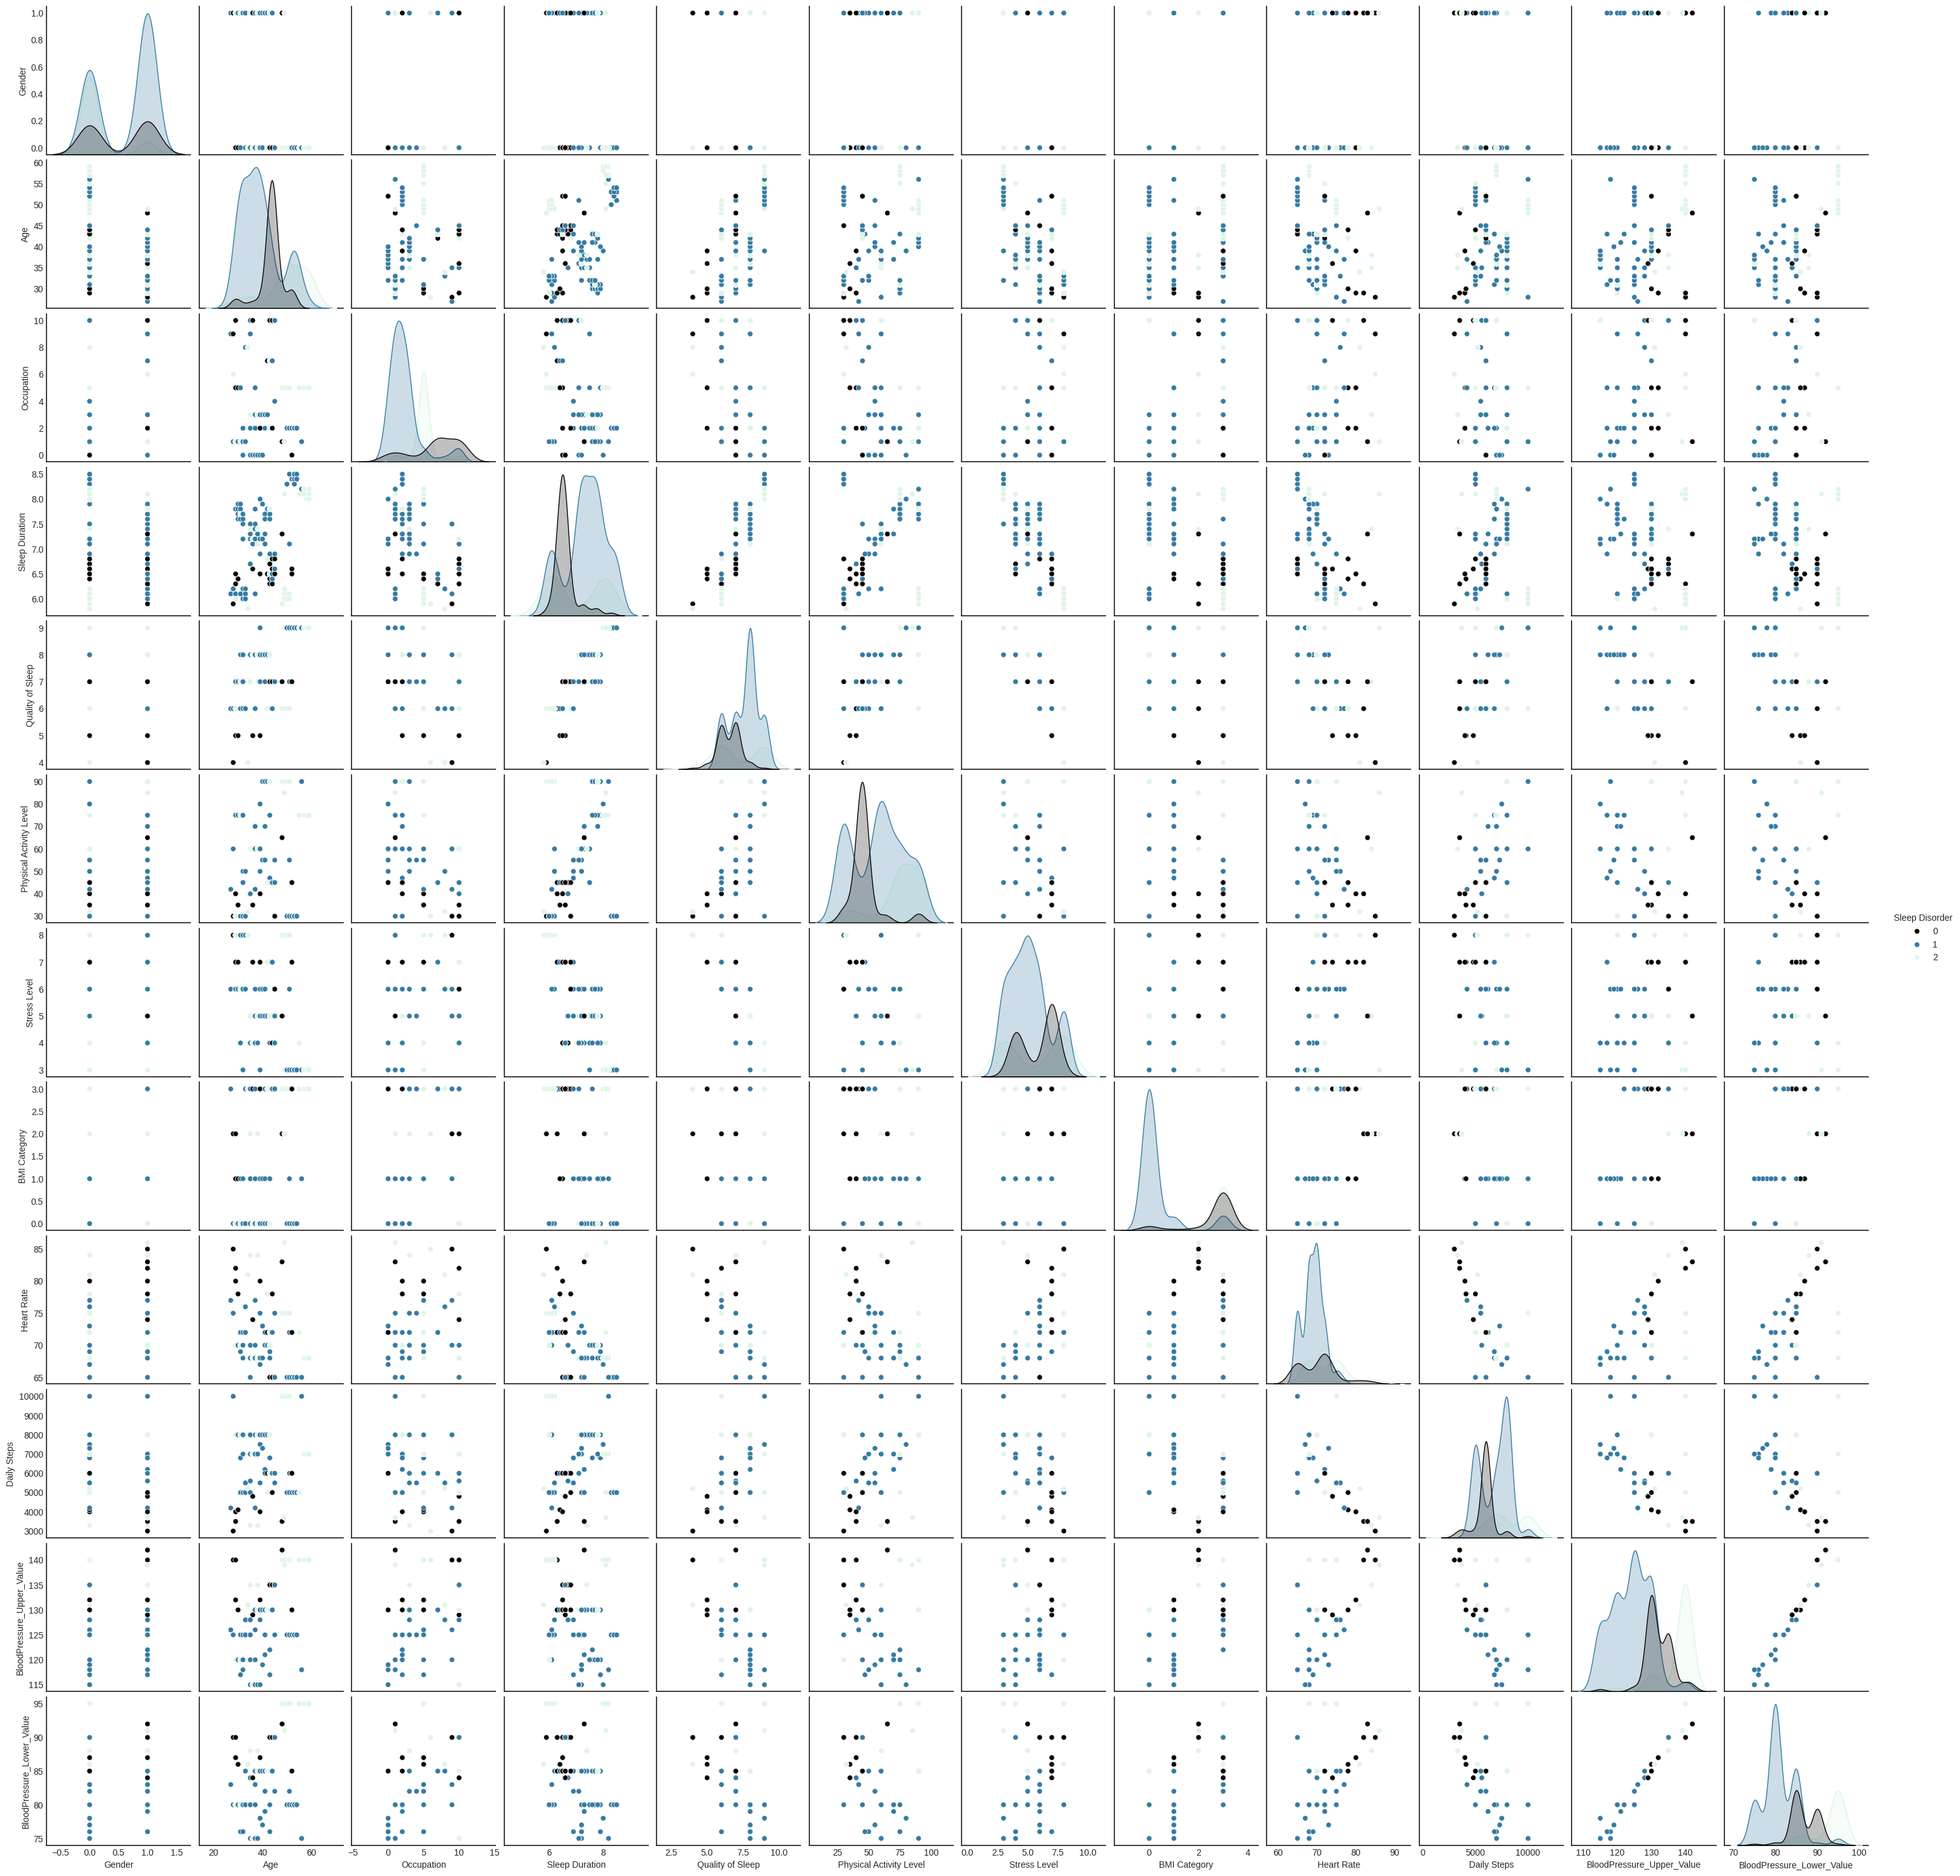

In [ ]:
plt.style.use('seaborn-v0_8-white')
sns.pairplot(data=df,hue='Sleep Disorder',palette='mako')
plt.legend()
plt.show()

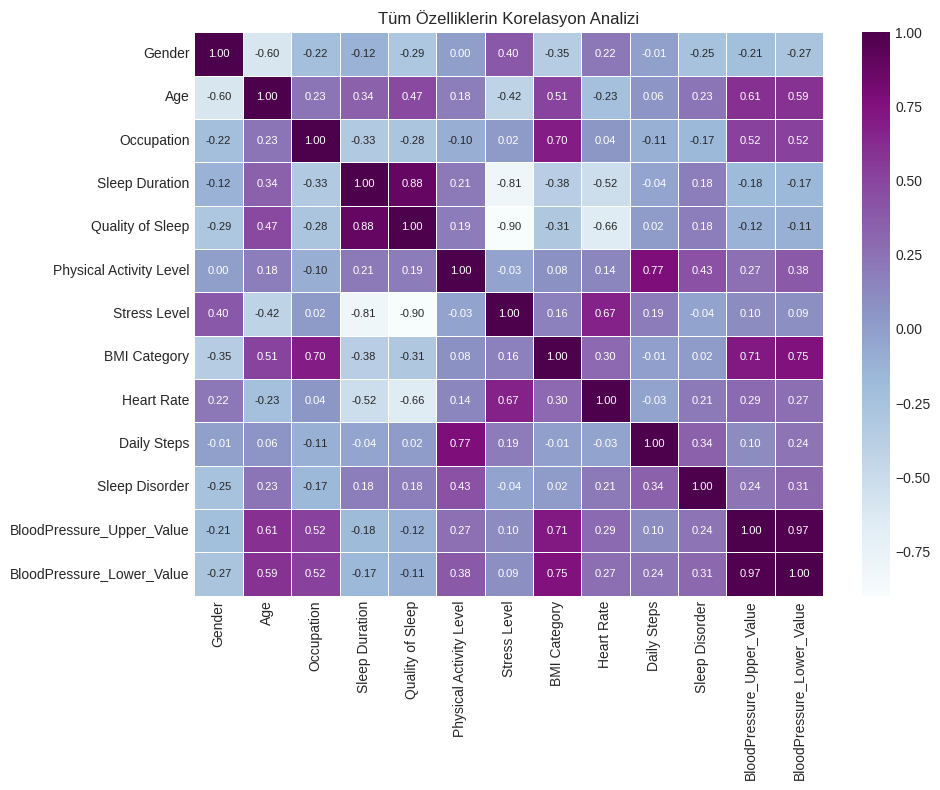

In [ ]:
correlation=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", annot_kws={"size":8}, linewidths=0.5, cmap='BuPu')
plt.title('Tüm Özelliklerin Korelasyon Analizi')
plt.tight_layout()
plt.show()

🔍 Öne Çıkan Korelasyonlar:


*  💡 1. Sleep Duration & Quality of Sleep: 0.88
Çok güçlü bir pozitif korelasyon var.

Uyku süresi arttıkça uyku kalitesi de artıyor → mantıklı ve beklenen bir ilişki.
*   💡 2. Stress Level ile:
Sleep Duration: -0.81
Quality of Sleep: -0.90

Bu, stres arttıkça hem uyku süresi hem de kalitenin düştüğünü gösteriyor → çok anlamlı ve güçlü negatif korelasyonlar.





*   💡 3. BMI Category ile:
Blood Pressure Upper: 0.71
Blood Pressure Lower: 0.75

Vücut kitle indeksi arttıkça kan basıncı da artıyor → fizyolojik açıdan anlamlı bir sonuç.
*   💡 4. Daily Steps & Physical Activity Level: 0.77
Bu da beklenen bir sonuç, fiziksel aktivite düzeyi arttıkça atılan adım sayısı da artıyor.


# ✂️ Veri Bölme(Data Spliting)

In [ ]:
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']



*  📌 Bağımsız (X) ve bağımlı (y) değişkenlerin ayrılması

*  📌 Hedef değişken "Sleep Disorder"







In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=0)

In [ ]:
print(len(X_train))
print(len(X_test))

261
113


# 🔍 SMOTE


*  📝  SMOTE (Synthetic Minority Over-sampling Technique), dengesiz veri
kümelerinde azınlık sınıfını artırarak daha dengeli bir veri dağılımı oluşturmayı amaçlayan bir yöntemdir.
*  📝  SMOTE eğitim veri setine uygulanır,test setine uygulanmaz.






In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train.value_counts())  # SMOTE uygulamadan önceki sınıf dağılımı
print(y_train_res.value_counts())  # SMOTE sonrası dağılım


Sleep Disorder
1    153
0     54
2     54
Name: count, dtype: int64
Sleep Disorder
1    153
0    153
2    153
Name: count, dtype: int64


In [ ]:
pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00


# 🔍 Lazy Predict

In [ ]:
from lazypredict.Supervised import LazyClassifier

lazy_model = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_model.fit(X_train, X_test, y_train, y_test)
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 261, number of used features: 12
[LightGBM] [Info] Start training from score -1.575536
[LightGBM] [Info] Start training from score -0.534082
[LightGBM] [Info] Start training from score -1.575536
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 🔍Hiperparametre Ayarı


*  🚀 Hiperparametre ayarı (Hyperparameter Tuning), makine öğrenimi modellerinin performansını optimize etmek için kullanılan bir tekniktir. Hiperparametreler, modelin öğrenme sürecinde değişmeyen, önceden belirlenmiş ayarlardır. Doğru hiperparametre seçimi, modelin doğruluğunu ve genelleme yeteneğini artırabilir.




In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])
param_grid = [
    {
        'clf': [ExtraTreesClassifier()],
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [None, 5, 10],
    },
    {
        'clf': [XGBClassifier()],
        'clf__n_estimators': [100, 200, 300],
        'clf__learning_rate': [0.01, 0.1, 0.3],
    },
    {
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [None, 5, 10],
    },
    {
        'clf': [DecisionTreeClassifier()],
        'clf__max_depth': [None, 5, 10, 15],
    },
    {
        'clf': [SVC()],
        'clf__kernel': ['linear', 'rbf'],
        'clf__C': [0.01, 0.1, 1, 10],
    },
    {
        'clf': [LogisticRegression()],
        'clf__solver': ['liblinear', 'lbfgs'],
        'clf__C': [0.01, 0.1, 1, 10],
    }
]

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

models = [
    ('Extra Trees', ExtraTreesClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVC', SVC()),
    ('Logistic Regression', LogisticRegression())
]

accuracy_scores = []
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

fig = go.Figure(data=go.Bar(x=[name for name, _ in models], y=accuracy_scores))
fig.update_layout(title='Modellerin Karşılaştırılması',
                  xaxis=dict(title='Modeller'),
                  yaxis=dict(title='Doğruluk'))
fig.show()



*   ✅ En iyi model




In [ ]:
print("En iyi model:", grid_search.best_estimator_)

En iyi model: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_stra

In [ ]:
importance = best_model.named_steps['clf'].feature_importances_
feature_names = X.columns

sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

fig = go.Figure(data=go.Bar(x=sorted_features, y=sorted_importance))
fig.update_layout(title='Özellik Önem Grafiği',
                  xaxis=dict(title='Özellikler'),
                  yaxis=dict(title='Önem'))
fig.show()

# 🎯 XGBClassifier Modelinin Sonuçları

Doğruluk: 0.8938053097345132
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.93      0.94      0.93        66
           2       0.91      0.83      0.87        24

    accuracy                           0.89       113
   macro avg       0.88      0.87      0.87       113
weighted avg       0.89      0.89      0.89       113



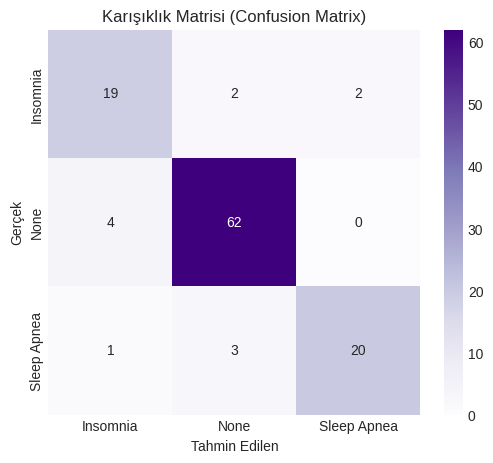

In [ ]:
best_params = grid_search.best_params_
{
    'clf': XGBClassifier(),
    'clf__n_estimators': 200,
    'clf__learning_rate': 0.1
}
from xgboost import XGBClassifier

xgb_best_params = {
    key.replace('clf__', ''): value
    for key, value in best_params.items()
    if key.startswith('clf__')
}

xgb_model = XGBClassifier(**xgb_best_params)

xgb_model.fit(X_train_res, y_train_res)

y_pred = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Doğruluk:", accuracy_score(y_test, y_pred))

print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
class_names = ['Insomnia', 'None', 'Sleep Apnea']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.show()


# Cross Validation


*   📌Çapraz doğrulama (Cross-validation), makine öğrenimi modellerinin genelleştirme performansını değerlendirmek için kullanılan bir tekniktir. Modelin farklı veri alt kümeleri üzerinde nasıl çalıştığını görmek için veri seti eğitim ve test bölümlerine ayrılır ve bu işlem birden fazla kez tekrarlanır.
*   📌Stratified K-Fold: Veri seti sınıf dağılımını koruyarak bölünür, özellikle dengesiz veri kümelerinde faydalıdır.


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(xgb_model, X_train_res, y_train_res, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-Validation Scores: [0.91304348 0.92391304 0.93478261 0.88043478 0.86813187]
Mean Accuracy: 0.9040611562350694
Standard Deviation: 0.025564453648436368


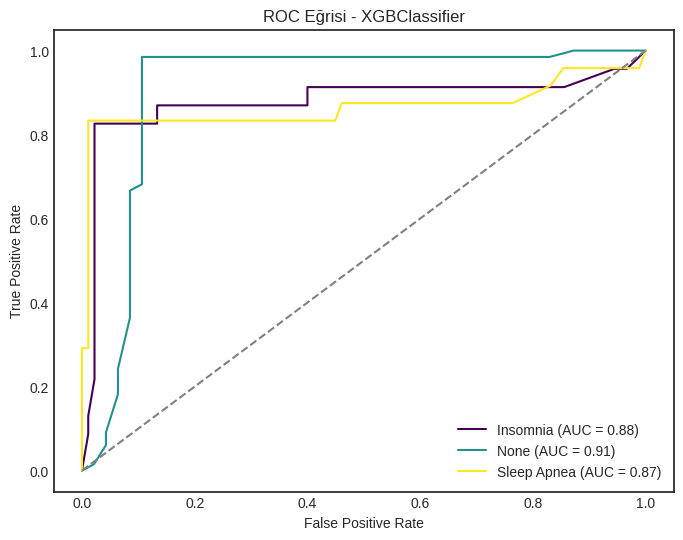

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

y_test_probs = xgb_model.predict_proba(X_test)
plt.figure(figsize=(8,6))
unique_classes = sorted(set(y_test))
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_classes)))

for idx, cls in enumerate(unique_classes):
    fpr, tpr, _ = roc_curve(y_test, y_test_probs[:, idx], pos_label=cls)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[idx], label=f"{class_names[idx]} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi - XGBClassifier")
plt.legend()
plt.show()


# Açıklamalı Yapay Zeka



*  SHAP (Shapley Additive Explanations): Her özelliğin model tahminine olan katkısını hesaplar.
*  LIME (Local Interpretable Model-Agnostic Explanations): Modelin belirli bir tahmin için nasıl karar verdiğini anlamak için yerel açıklamalar sunar.



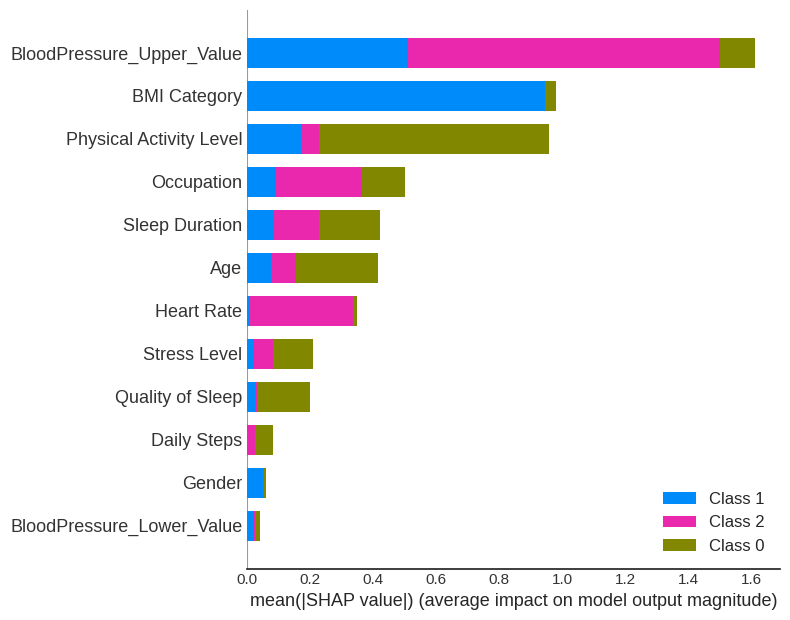

In [ ]:
import shap
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5f9c375b7155df0e8fb817225906770a201b446adadb0430b9e52a3fba833546
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train_res.values, feature_names=X.columns, class_names=["Insomnia", "None", "Sleep Apnea"], mode="classification")

exp = explainer.explain_instance(X_test.iloc[0].values, xgb_model.predict_proba)
exp.show_in_notebook()
